# This notebook contains the implementation of item recommendation using Machine Learning.

## Import packages

In [7]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import seaborn as sns; sns.set(style="ticks", color_codes=True)


## Read the dataset


In [11]:
df = pd.read_csv("/home/sanath/ITS1/iCart/recommender/data_analysis/dataset.csv")
df.head()

,age,gender,shopping_month,item_id,items_purchased
0,22,male,january,55,Allen Solly Navy Jacket
1,23,male,january,17,Casio FX100MS Scientific Calculator
2,23,male,january,18,Cello Butter Gel Pen
3,25,female,november,71,Catwalk Black Heels
4,25,female,november,68,Monte Carlo Red Cardigan


## Preprocess and label encode the dataset


In [12]:
l_gender = LabelEncoder()
df["gender"] = l_gender.fit_transform(df["gender"])

l_shopping_month = LabelEncoder()
df["shopping_month"] = l_shopping_month.fit_transform(df["shopping_month"])

np.save('classes_gender.npy', l_gender.classes_)
np.save('classes_shopping_month.npy', l_shopping_month.classes_)

df.head()

,age,gender,shopping_month,item_id,items_purchased
0,22,1,4,55,Allen Solly Navy Jacket
1,23,1,4,17,Casio FX100MS Scientific Calculator
2,23,1,4,18,Cello Butter Gel Pen
3,25,0,9,71,Catwalk Black Heels
4,25,0,9,68,Monte Carlo Red Cardigan


## Make pair plots for analysis


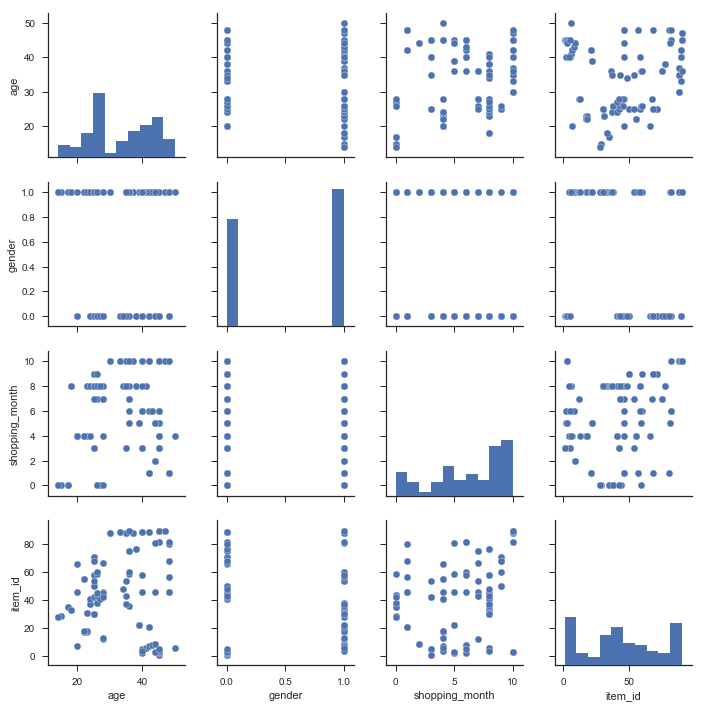

In [14]:
g = sns.pairplot(df)

## Selecting the input and output


In [15]:
X = df.loc[:, df.columns != 'item_id']
Y = df["item_id"]

## Train and Test split


In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.33, random_state=42)

## Model Building


In [17]:
clf = GaussianNB()
clf.fit(X_train, y_train)

ValueError: could not convert string to float: 'Britania 50-50'

## Testing the model


In [18]:
y_pred = clf.predict(X_test) 
print("Model accuracy :",accuracy_score(y_test, y_pred))

NotFittedError: This GaussianNB instance is not fitted yet. Call 'fit' with appropriate arguments before using this method.

# Dumping model into a file

## Using joblib of sklearn.external for saving the model 

In [18]:
from sklearn.externals import joblib
filename = "model_parameters.sav"
joblib.dump(clf, filename)
loaded_model = joblib.load(filename)
y_pred = loaded_model.predict(X_test) 
print("Model accuracy :",accuracy_score(y_test, y_pred))
loaded_model.predict_proba(np.array([[45,1, 9]])) 

Model accuracy : 0.8623188405797102


array([[0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 1.71011539e-05, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 1.01970148e-03,
        0.00000000e+00, 9.98963197e-01]])